<a href="https://colab.research.google.com/github/AshiniAnantharaman/Image_classification_of_CIFAR10_dataset/blob/main/small_image_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION FROM KERAS DATASET

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

The classes are:

Label	|Description|
------|------------
0	|airplane
1	|automobile
2	|bird
3	|cat
4	|deer
5	|dog
6	|frog
7	|horse
8	|ship
9	|truck

*   The classification is done using ANN.
*   The same classification is done using CNN as well.


### Importing the required data and preparing the train and test data

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [33]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [34]:
X_train.shape

(50000, 32, 32, 3)

In [35]:
y_train.shape

(50000, 1)

In [36]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [37]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

# IMAGE VISUALIZATION

Below are the classes and the sample images classified under each class

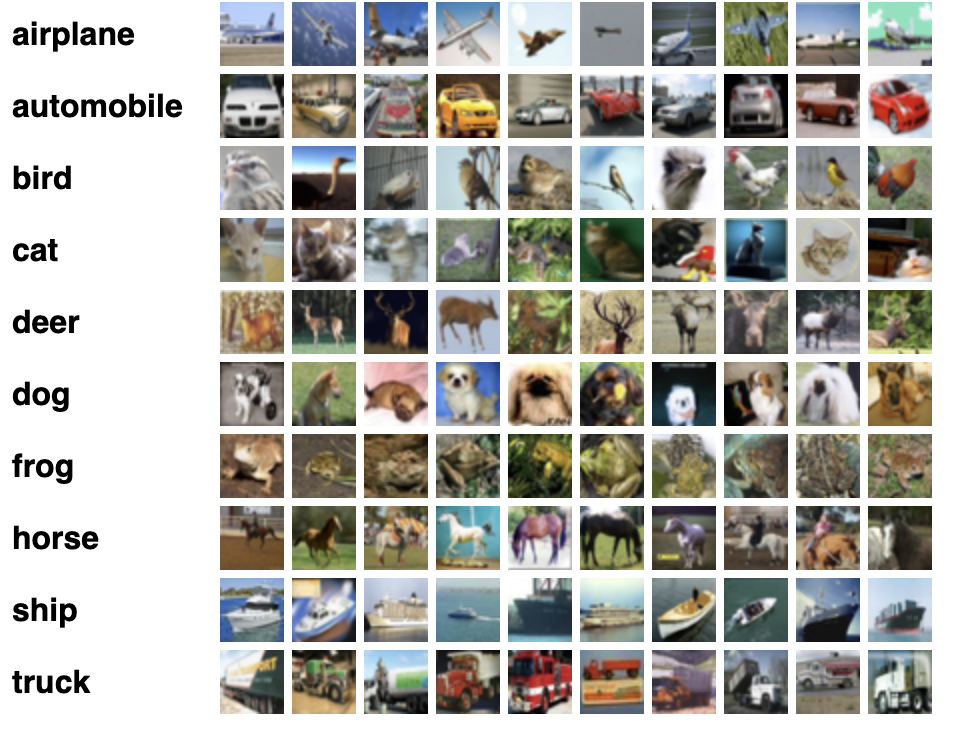

In [38]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [39]:
def plot_sample(X, y, index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

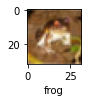

In [40]:
plot_sample(X_train, y_train, 0)

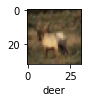

In [41]:
plot_sample(X_train, y_train, 3)

In [42]:
y_train[3]

4

In [43]:
classes[y_train[3]]

'deer'

In [44]:
y_train[:3]

array([6, 9, 9], dtype=uint8)

In [45]:
y_test.shape

(10000, 1)

In [46]:
X_train.shape

(50000, 32, 32, 3)

In [47]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

CATEORICAL ENCODING

In [48]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [49]:
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [50]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

NEURAL NETWORK MODEL CREATION 

In [51]:
ann_model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

ann_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ann_model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.8983 - accuracy: 0.3311
Epoch 2/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.6623 - accuracy: 0.4008
Epoch 3/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.5749 - accuracy: 0.4333
Epoch 4/5
1563/1563 [==============================] - 121s 78ms/step - loss: 1.5216 - accuracy: 0.4579
Epoch 5/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4857 - accuracy: 0.4688


In [55]:
ann_model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 8s 25ms/step - loss: 1.5173 - accuracy: 0.4653


[1.5172990560531616, 0.4652999937534332]

In [54]:
np.argmax(ann_model.predict(X_test_scaled)[0])

3

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann_model.predict(X_test_scaled)
y_pred_class = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.48      0.55      0.51      1000
           1       0.63      0.55      0.59      1000
           2       0.41      0.20      0.27      1000
           3       0.32      0.27      0.29      1000
           4       0.49      0.26      0.34      1000
           5       0.37      0.42      0.40      1000
           6       0.43      0.60      0.51      1000
           7       0.44      0.61      0.51      1000
           8       0.57      0.62      0.60      1000
           9       0.51      0.56      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.45     10000
weighted avg       0.47      0.47      0.45     10000



# CONVOLUTION NEURAL NETWORK

In [66]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),                     

    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')    
    ])

In [67]:
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 59s 37ms/step - loss: 1.4403 - accuracy: 0.4834
Epoch 2/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0805 - accuracy: 0.6199
Epoch 3/5
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9436 - accuracy: 0.6712
Epoch 4/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8577 - accuracy: 0.7010
Epoch 5/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7884 - accuracy: 0.7252


In [70]:
cnn_model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 5s 14ms/step - loss: 0.9092 - accuracy: 0.6872


[0.9091879725456238, 0.6872000098228455]

In [71]:
y_pred = cnn_model.predict(X_test_scaled)
y_pred[:5]

array([[1.75698078e-03, 3.06938782e-05, 1.64506515e-03, 9.54060793e-01,
        2.89056625e-04, 2.85015497e-02, 6.51204167e-03, 1.98428083e-04,
        6.57528592e-03, 4.30129352e-04],
       [1.01803581e-03, 2.26169564e-02, 1.28423408e-05, 4.42386045e-06,
        7.95311621e-07, 2.20727827e-08, 6.94261288e-08, 1.66006743e-07,
        9.75063860e-01, 1.28274574e-03],
       [2.70469517e-01, 1.04077525e-01, 9.18436702e-03, 2.14035604e-02,
        1.60711980e-03, 2.25709053e-03, 9.06066853e-04, 4.90262592e-03,
        5.04364491e-01, 8.08276907e-02],
       [8.26369584e-01, 7.13752117e-03, 2.74156872e-03, 1.24779507e-03,
        2.75722210e-04, 2.95879399e-05, 4.68924496e-04, 9.26987195e-05,
        1.59783185e-01, 1.85348024e-03],
       [1.06414891e-05, 3.66195454e-05, 2.73739956e-02, 3.12687494e-02,
        7.89043725e-01, 3.83176375e-03, 1.47720695e-01, 6.68589550e-04,
        4.25465551e-05, 2.62173103e-06]], dtype=float32)

In [72]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [73]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [90]:
def plot_sample_test(X, y, index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_test[index])
    plt.xlabel(classes[y[index]])

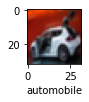

In [100]:
y_test = y_test.reshape(-1,)
plot_sample_test(X_test, y_test, 6)

In [101]:
y_pred = cnn_model.predict(X_test_scaled)
y_pred_class = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1000
           1       0.84      0.78      0.81      1000
           2       0.49      0.66      0.56      1000
           3       0.51      0.52      0.51      1000
           4       0.73      0.49      0.59      1000
           5       0.61      0.53      0.57      1000
           6       0.85      0.70      0.77      1000
           7       0.66      0.81      0.72      1000
           8       0.79      0.83      0.81      1000
           9       0.76      0.80      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

